In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import savgol_filter 
from matplotlib import rcParams
import sys
import os
import csv
import warnings
import matplotlib.cbook

import peakutils
import pandas as pd


from voltammetry import core, fitting

ImportError: cannot import name 'sgofilter' from 'scipy' (e:\miniconda\envs\ecshackweek\lib\site-packages\scipy\__init__.py)

data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt Opened
1
2


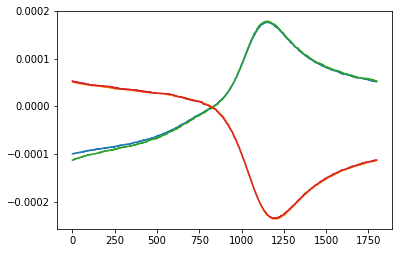

In [2]:


dict_1,n_cycle = core.read_file('data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt')
for i in range(n_cycle):
        print(i+1)
        df = core.data_frame(dict_1, i+1)
        pot = df.Potential
        cur=df.Current
        pot1, pot2 = core.split(pot)
        cur1, cur2 = core.split(cur)

        #plt.plot(pot1,cur1)
        #plt.plot(pot2,cur2)
       
        df1= pd.DataFrame(cur1,pot1)
        df1.to_numpy()
        vector1 = df1.to_numpy()
        
        df2= pd.DataFrame(cur2,pot2)
        df2.to_numpy()
        vector2 = df2.to_numpy()
        
        plt.plot(vector1)
        plt.plot(vector2)
        
        
        vector1_cur1 = vector1[:,0]
        
        
        

In [3]:
savgol_filter(vector1_cur1, 9, 2, mode='nearest')

array([-1.13062788e-04, -1.12931749e-04, -1.12827030e-04, ...,
        5.31465035e-05,  5.31892143e-05,  5.32097801e-05])

In [4]:
sm_cur1 = savgol_filter(vector1_cur1, 21, 3, mode='nearest')

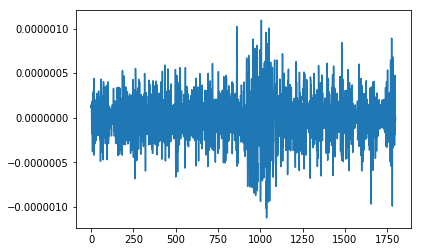

In [5]:
plt.plot(sm_cur1-cur1)

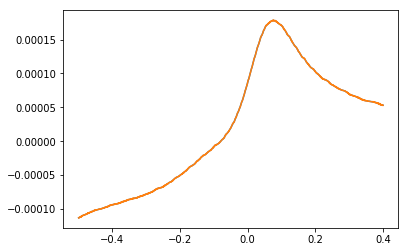

In [6]:
plt.plot(pot1, sm_cur1)
plt.plot(pot1, cur1)

In [7]:
der_1 = np.diff(sm_cur1)

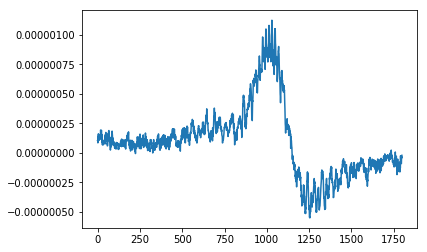

In [8]:
plt.plot(der_1)

In [9]:
peak_pt1 = np.argmin(abs(der_1 - 0))

peak_pot1 = pot1[peak_pt1]
peak_cur1 = cur1[peak_pt1]
print(peak_pt1, peak_pot1, peak_cur1)

1149 0.0750089 0.000177909


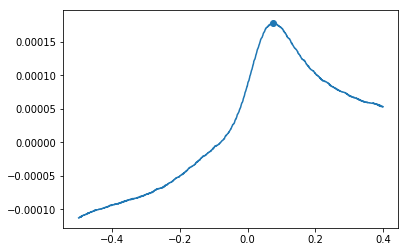

In [10]:
plt.plot(pot1,cur1)
plt.scatter(peak_pot1,peak_cur1)